In [1]:
# 可视化我们的数据集
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#用faker库,构建一个数据集，如果没有，需要提前安装 pip install Faker
import pandas as pd
from   faker import Faker
fake = Faker(locale='zh_CN')

u11 = ['uid_'+'1']*3
i11 = [fake.ipv4() for i in range(0,3)]
u21 = ['uid_'+'2']*3

u12 = ['uid_'+'3']*3
i12 = [fake.ipv4() for i in range(0,3)]
u22 = ['uid_'+'4']*3

i13 =[fake.ipv4() for i in range(0,3)]

import pandas as pd
df = pd.DataFrame({
    'uid':u11+u21 + u12+u22+u12,
    'Ip':i11+i11 +i12+i12+i13
     })
df

,uid,Ip
0,uid_1,65.149.142.43
1,uid_1,181.75.19.199
2,uid_1,179.143.238.46
3,uid_2,65.149.142.43
4,uid_2,181.75.19.199
5,uid_2,179.143.238.46
6,uid_3,142.136.88.253
7,uid_3,175.183.186.123
8,uid_3,180.69.71.143
9,uid_4,142.136.88.253


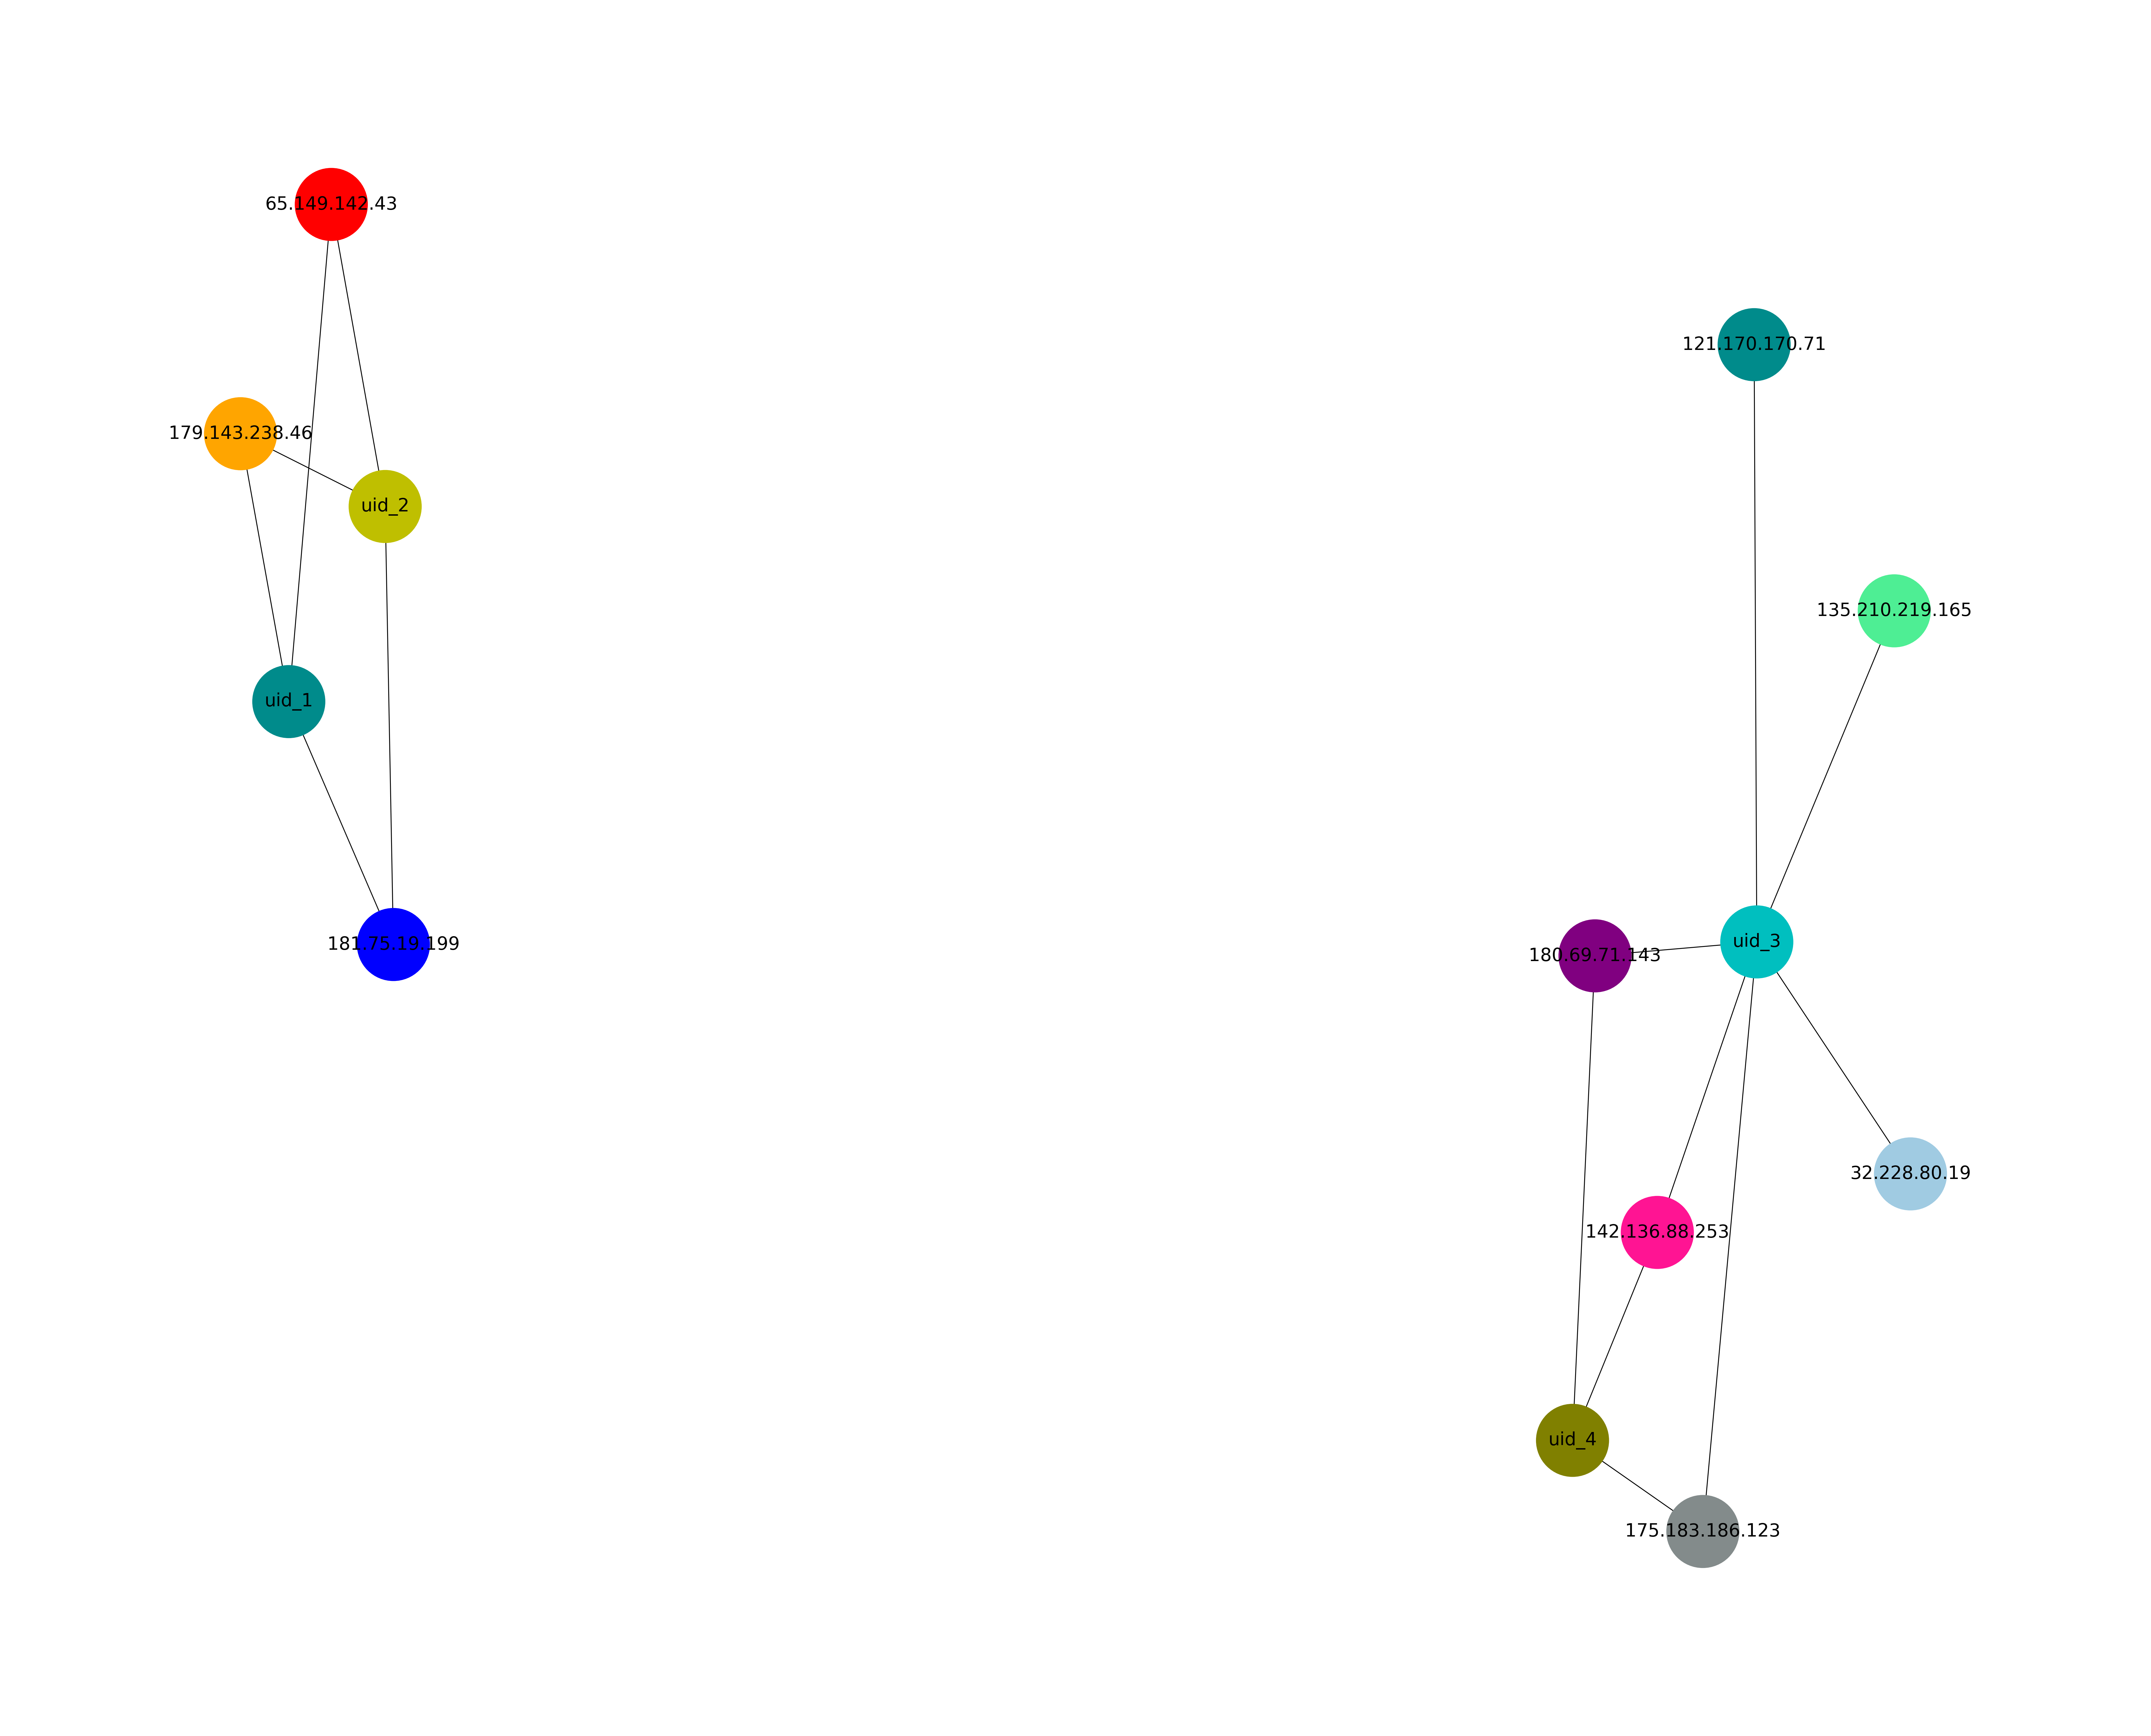

In [3]:

# 转换成Graph格式
da = df[['uid','Ip']].values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))


#显示改图
plt.figure(figsize=(4,3.2),dpi=2300)
colors = ['#008B8B','r','b','orange','y','c','DeepPink','#838B8B','purple','olive','#A0CBE2','#4EEE94']*50
colors = colors[0:len(G.nodes())]



#使用spring_layout布局

nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=50,
                 font_size=2,
                 width=0.1,
                 alpha=1
                 )
#plt.title("spring_layout")
plt.axis('off')
plt.show()

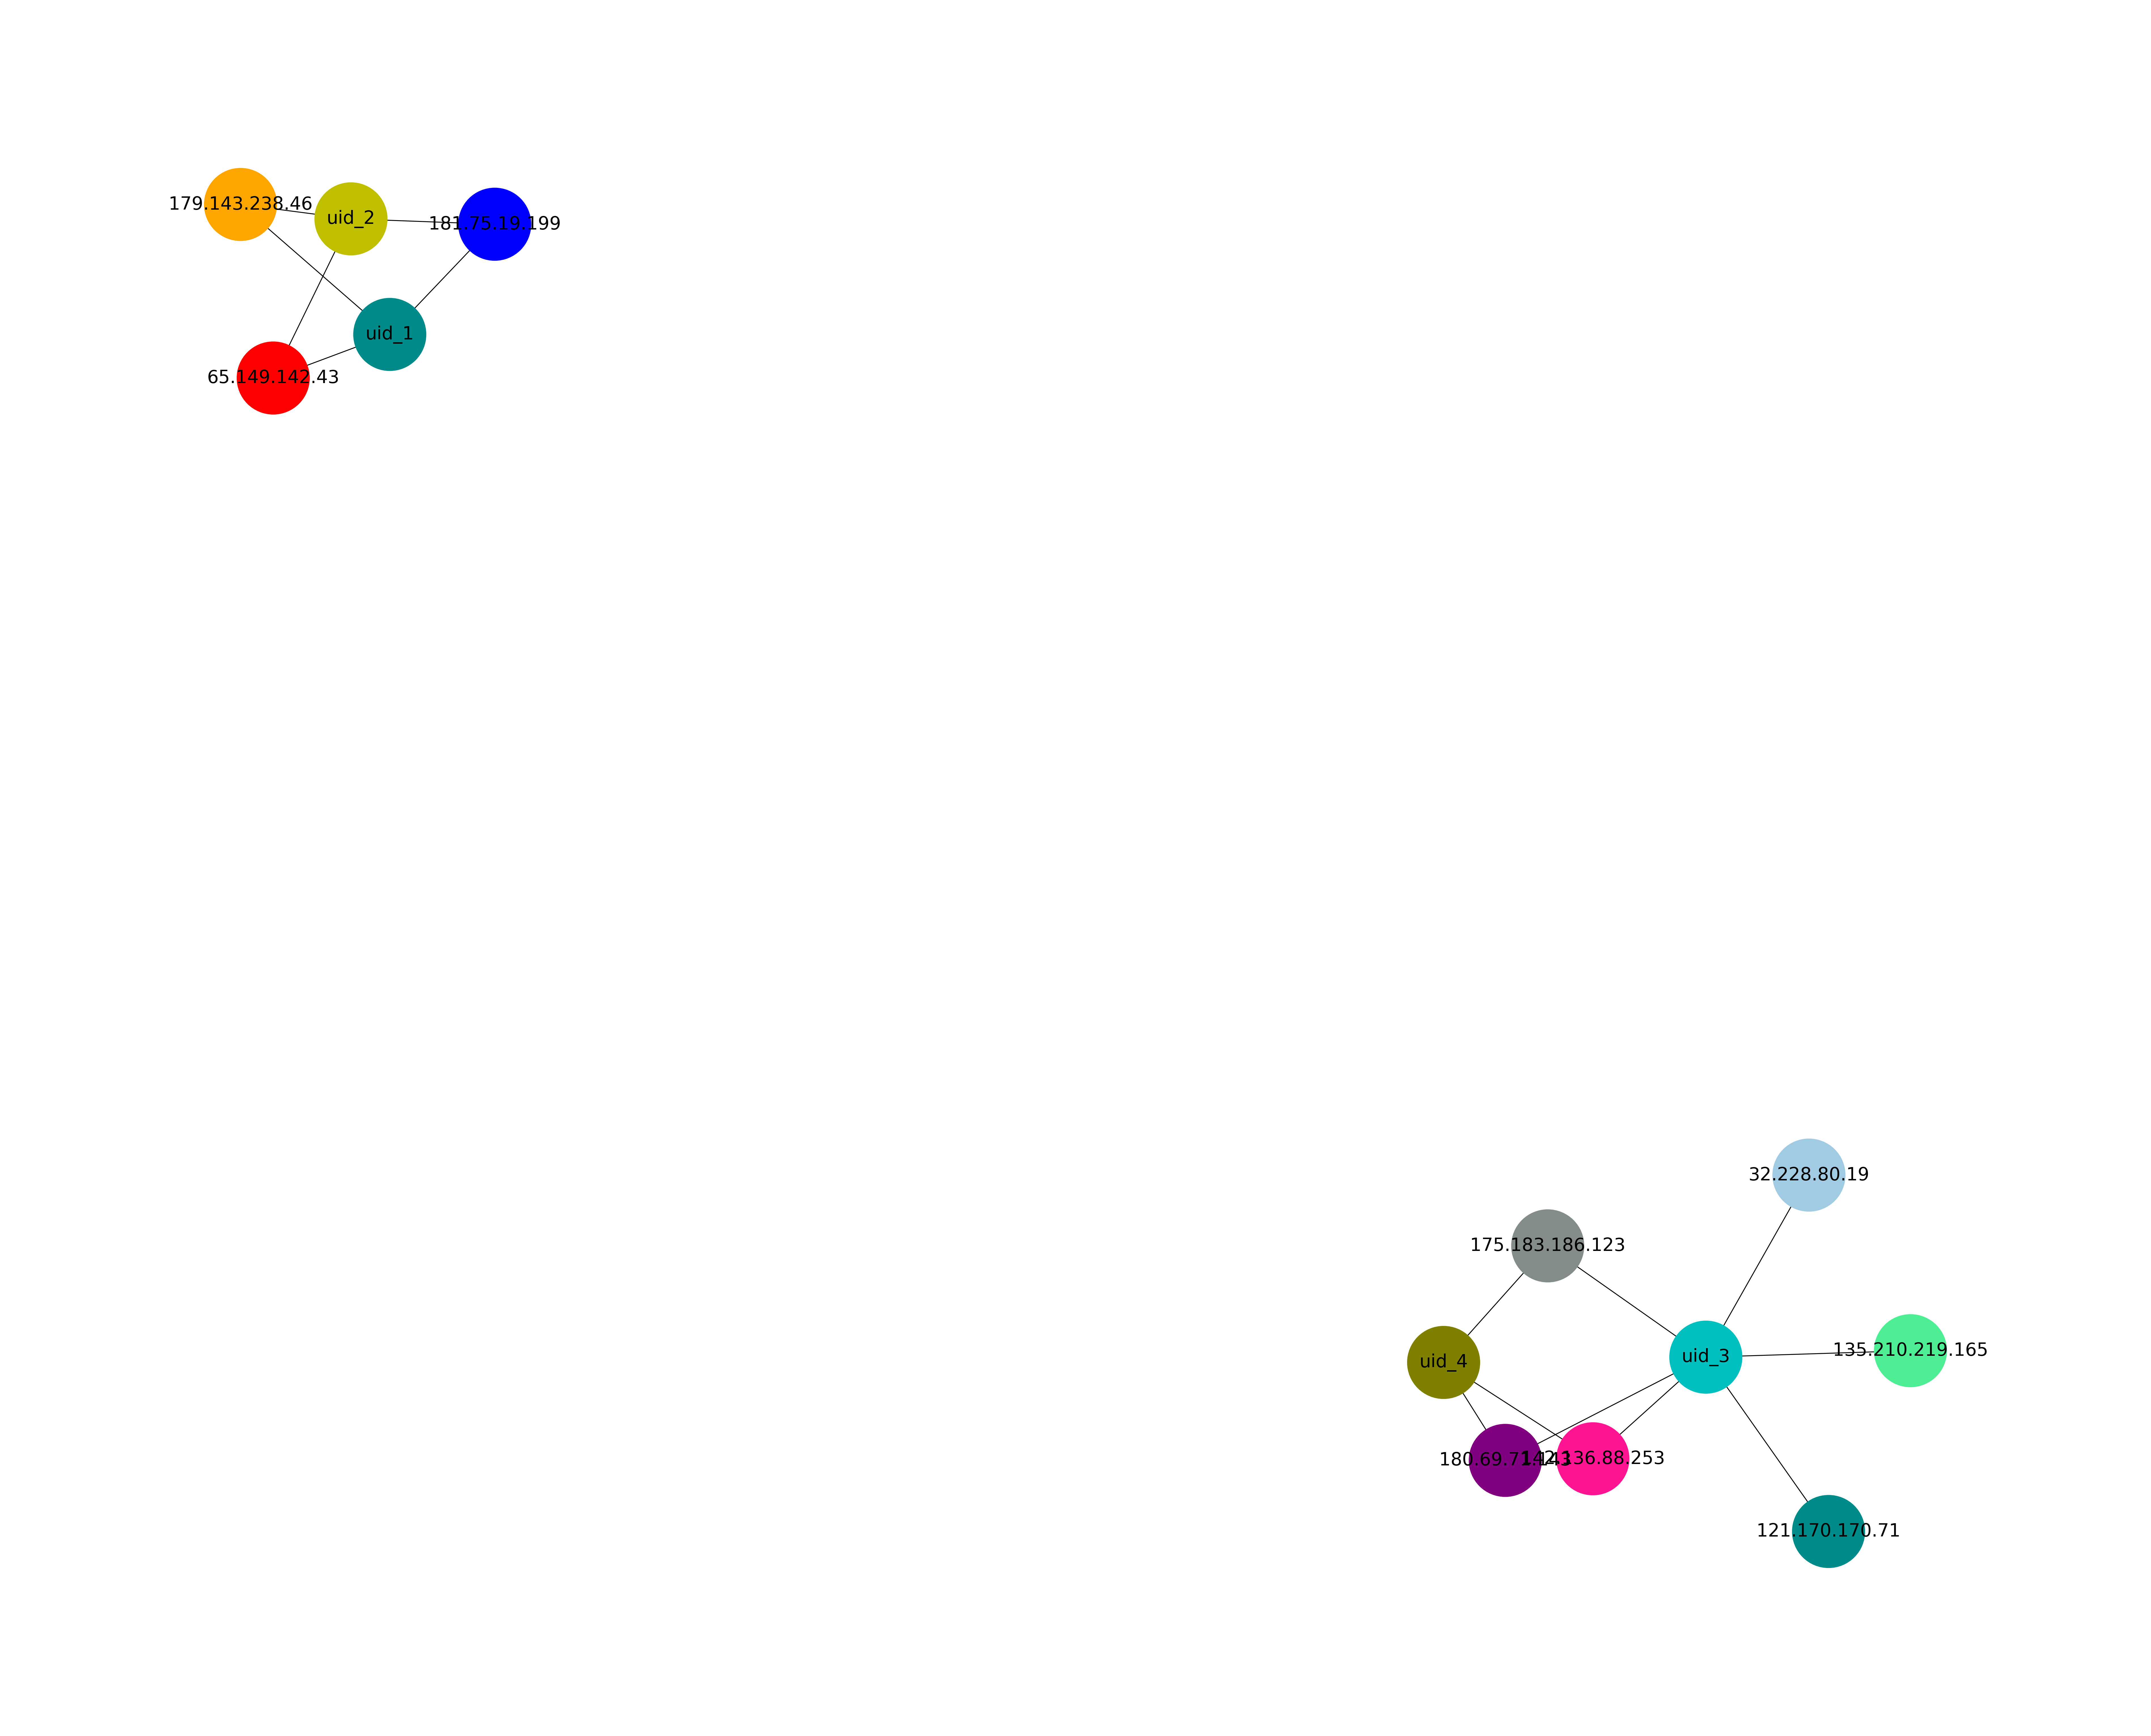

In [4]:

# 转换成Graph格式
da = df[['uid','Ip']].values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))


#显示改图
plt.figure(figsize=(4,3.2),dpi=2300)
colors = ['#008B8B','r','b','orange','y','c','DeepPink','#838B8B','purple','olive','#A0CBE2','#4EEE94']*50
colors = colors[0:len(G.nodes())]



#使用spring_layout布局

nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=50,
                 font_size=2,
                 width=0.1,
                 alpha=1
                 )
#plt.title("spring_layout")
plt.axis('off')
plt.show()



In [6]:


# 相似度计算：计算交集，次数，并集
dm = pd.merge(df,
              df,
              on='Ip',
              how='inner'
             )
last = dm.groupby(['uid_x','uid_y']).agg({'Ip': pd.Series.nunique}).reset_index()
last = last[last['uid_x']!=last['uid_y']]

last.columns=['uid_x','uid_y','jiao_cnt']

dfgr = df.groupby(['uid']).agg({'Ip': pd.Series.nunique}).reset_index()
dfgr.columns=['uid_x','ip_cnt']
dm = pd.merge(last,dfgr,on='uid_x')

dfgr.columns=['uid_y','ip_cnt']
dm = pd.merge(dm,dfgr,on='uid_y')

In [7]:
dm

,uid_x,uid_y,jiao_cnt,ip_cnt_x,ip_cnt_y
0,uid_1,uid_2,3,3,3
1,uid_2,uid_1,3,3,3
2,uid_3,uid_4,3,6,3
3,uid_4,uid_3,3,3,6


In [8]:

dm['bing_cnt'] = dm['ip_cnt_x']+dm['ip_cnt_y']-dm['jiao_cnt']

dm['sim'] = dm['jiao_cnt']/dm['bing_cnt'] 
dm

,uid_x,uid_y,jiao_cnt,ip_cnt_x,ip_cnt_y,bing_cnt,sim
0,uid_1,uid_2,3,3,3,3,1.0
1,uid_2,uid_1,3,3,3,3,1.0
2,uid_3,uid_4,3,6,3,6,0.5
3,uid_4,uid_3,3,3,6,6,0.5


In [9]:
# 阈值定义
dm[dm['sim']>0.4]

,uid_x,uid_y,jiao_cnt,ip_cnt_x,ip_cnt_y,bing_cnt,sim
0,uid_1,uid_2,3,3,3,3,1.0
1,uid_2,uid_1,3,3,3,3,1.0
2,uid_3,uid_4,3,6,3,6,0.5
3,uid_4,uid_3,3,3,6,6,0.5


In [10]:

# 找到所有连通子图
com = list(nx.connected_components(G))

# 打印看看什么格式的，可以看到得到的结果为列表-字典格式
print(com)

# 将 列表-字典 整理成数据表格形式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'object_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 查看数据结果
df_com

# 统计每个团伙人数 并降序
df_com.groupby('group_id').count().sort_values(by='object_id', ascending=False) 


[{'uid_1', '181.75.19.199', '179.143.238.46', 'uid_2', '65.149.142.43'}, {'32.228.80.19', '135.210.219.165', '121.170.170.71', '142.136.88.253', '180.69.71.143', 'uid_4', '175.183.186.123', 'uid_3'}]


,object_id
group_id,
1,8
0,5
